<a href="https://colab.research.google.com/github/Shubhangani-Tiwari/Play-Store--Apps-Reviews-Project/blob/main/Demand_prdiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
pd.options.display.max_columns = 100

In [5]:
#Read the dataset
df=pd.read_csv('/content/drive/MyDrive/Nairobi Transport Data.zip')
df

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49
...,...,...,...,...,...,...,...,...,...,...
51640,13826,9B,Mpesa,8V2XDDZR6V,20-04-18,8:00,Awendo,Nairobi,Bus,49
51641,13809,18A,Mpesa,4PEBSVJSNK,20-04-18,8:00,Migori,Nairobi,Bus,49
51642,13809,17A,Mpesa,LVN64LZDNN,20-04-18,8:00,Migori,Nairobi,Bus,49
51643,13796,16B,Mpesa,REYBSKTYWN,20-04-18,7:08,Awendo,Nairobi,Bus,49


In [8]:
#first 5 values
df.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


In [9]:
#last 5 values
df.tail()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
51640,13826,9B,Mpesa,8V2XDDZR6V,20-04-18,8:00,Awendo,Nairobi,Bus,49
51641,13809,18A,Mpesa,4PEBSVJSNK,20-04-18,8:00,Migori,Nairobi,Bus,49
51642,13809,17A,Mpesa,LVN64LZDNN,20-04-18,8:00,Migori,Nairobi,Bus,49
51643,13796,16B,Mpesa,REYBSKTYWN,20-04-18,7:08,Awendo,Nairobi,Bus,49
51644,14304,7,Mpesa,AQN7FBUSGP,14-11-17,5:10,Kisii,Nairobi,Bus,49


# **Understanding the data**

In [10]:
#Shape
df.shape

(51645, 10)

In [11]:
#information about null values and datatype for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ride_id          51645 non-null  int64 
 1   seat_number      51645 non-null  object
 2   payment_method   51645 non-null  object
 3   payment_receipt  51645 non-null  object
 4   travel_date      51645 non-null  object
 5   travel_time      51645 non-null  object
 6   travel_from      51645 non-null  object
 7   travel_to        51645 non-null  object
 8   car_type         51645 non-null  object
 9   max_capacity     51645 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 3.9+ MB


In [12]:
#information about null values
df.isnull().sum()

ride_id            0
seat_number        0
payment_method     0
payment_receipt    0
travel_date        0
travel_time        0
travel_from        0
travel_to          0
car_type           0
max_capacity       0
dtype: int64

In [14]:
#change datatype of ride_id and max_capacity from int to object because it is also a nominal categorial data and we want their categorical description.
df[["ride_id","max_capacity"]]=df[["ride_id","max_capacity"]].astype(str)
     

In [15]:
#categorical description
df.describe(include='object')

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
count,51645,51645,51645,51645,51645,51645,51645,51645,51645,51645
unique,6249,61,2,51645,149,78,17,1,2,2
top,8454,1,Mpesa,UZUEHCBUSO,10-12-17,7:09,Kisii,Nairobi,Bus,49
freq,50,2065,51532,1,856,3926,22607,51645,31985,31985


# **Summary:-**

In Ride_id, there are 6249 unique values.

There are total 61 unique seat numbers in this dataset.

Travelers have used 2 types of payment methods and most of the people(i.e. 51532 out of 51645) have used Mpesa to pay for their ticket.

The record of 149 days is present in this dataset.

In travel_time, there are 78 unique time.

There are 17 towns where rides are originated and 22607 rides are only originated from Kisii.

There are 2 type of cars and most of them(31985 out of 51645) are bus.

There are 2 Maximum seat capacity and most of them have 49 seat capacity and frequency of 49 seat capacity is equal to frequency of bus, Thus we say that Bus have 49 seat capacity.

In [20]:
#get all the column names of the dataset
columns=df.columns
columns

Index(['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time', 'travel_from', 'travel_to', 'car_type',
       'max_capacity'],
      dtype='object')

In [122]:
df['travel_from'].unique()

array(['Migori', 'Keroka', 'Homa Bay', 'Kisii', 'Keumbu', 'Rongo',
       'Kijauri', 'Oyugis', 'Awendo', 'Sirare', 'Nyachenge', 'Kehancha',
       'Kendu Bay', 'Sori', 'Rodi', 'Mbita', 'Ndhiwa'], dtype=object)

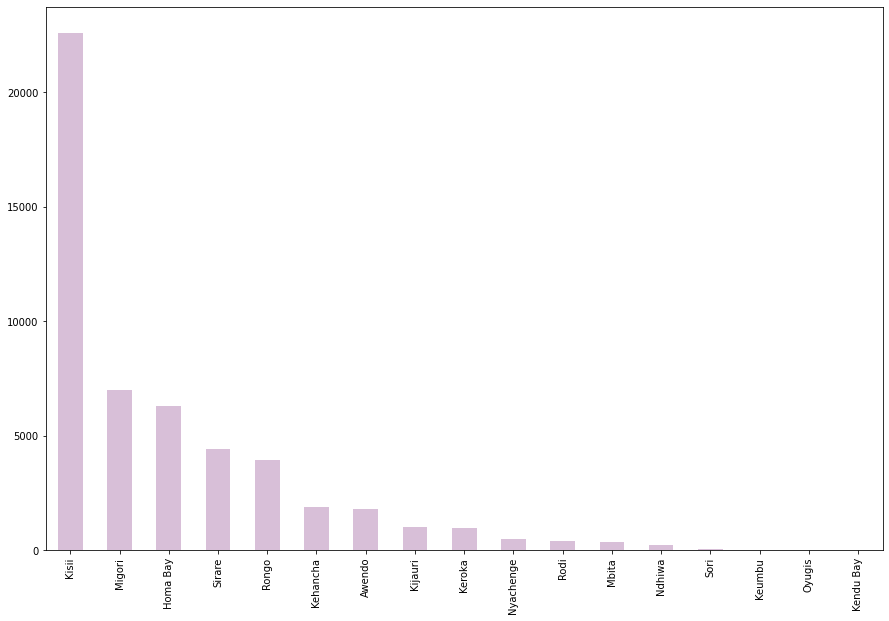

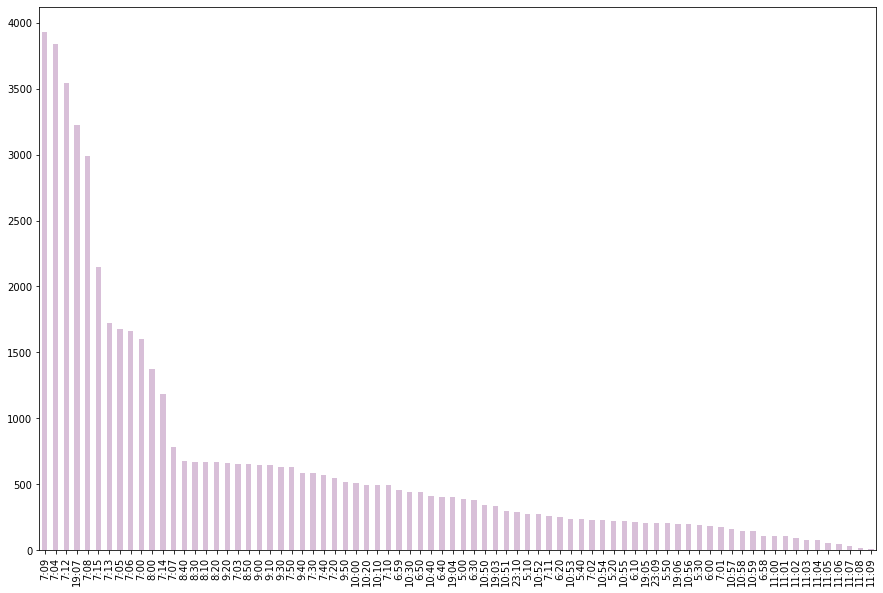

In [34]:
bar_plot_columns = ['travel_from','travel_time']
for column in bar_plot_columns:
  df[column].value_counts().plot(kind='bar',figsize=(15,10),color='thistle')
  plt.show()

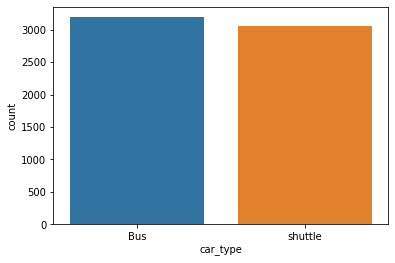

KeyError: ignored

In [74]:
plot_count_cols = ['car_type','payment_method','max_capacity']
for plots in plot_count_cols:
  sns.countplot(df[plots])
  plt.show()


# **Observations:**

We have two types of payment Method Mpesa and cash, people rarely pay Cash.

We have two types of car 'Bus and Shuttle' which has maximum capacity of 49 and 11.

In [42]:
#finding the relation between car_type and max_capacity
df.groupby(['car_type','max_capacity'])['max_capacity'].count().unstack()

max_capacity,11,49
car_type,,
Bus,NaN,31985.0
shuttle,19660.0,NaN


We conclude that bus has seat capacity of 49 and shuttle has seat capacity of 11.

In [44]:
#finding the relation between car_type and travel_from
df.groupby(['travel_from','car_type'])['car_type'].count().unstack()

car_type,Bus,shuttle
travel_from,,
Awendo,1788.0,NaN
Homa Bay,6304.0,NaN
Kehancha,1909.0,NaN
Kendu Bay,1.0,NaN
Keroka,341.0,647.0
Keumbu,3.0,19.0
Kijauri,408.0,623.0
Kisii,4236.0,18371.0
Mbita,378.0,NaN


as we see that, Shuttle only used for travel from Keroka, Keumbu, Kijauri and Kisii town, whereas bus is used for travel from all the town.

In [128]:
df['ride_id'].value_counts()

8454     50
13211    49
10834    49
8090     49
11382    49
         ..
10090     1
10091     1
10114     1
10116     1
14304     1
Name: ride_id, Length: 6249, dtype: int64

## **Finding Our Target Variable**

Since there are total 61645 rows i.e 61645 bookings but only 6249 unique ride_id. This implies that there are more than one seats have booked by single ride_id.

So in order to find the total seat_booking we need to count the different seat numbers corresponding to  single ride_id.

In [129]:
df.groupby(['ride_id']).seat_number.count()

ride_id
1442      1
5437      1
5710      1
5777      5
5778     31
         ..
20113     9
20114     4
20115     5
20116     1
20117     1
Name: seat_number, Length: 6249, dtype: int64

In [48]:
totl_tickit=df.groupby(['ride_id']).seat_number.count().sort_values(ascending=False).rename("number_of_tickit").reset_index()
totl_tickit.head()

,ride_id,number_of_tickit
0,8454,50
1,10834,49
2,8090,49
3,11382,49
4,13211,49


As we have found our target variable therefore let's delete the duplicate values from ride_id.

In [49]:
#Drop duplicates
df=df.drop_duplicates('ride_id')

In [50]:
#shape of new dataset after dropping duplicates
df.shape

(6249, 10)

In [51]:
#merge target variable and independent variable on the basis of ride_id
df =df.merge(totl_tickit,on= 'ride_id')
df.head(10)

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_tickit
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49,1
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49,1
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49,1
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49,5
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49,31
5,5781,22A,Mpesa,VGG7Q3MVJX,27-11-17,7:09,Homa Bay,Nairobi,Bus,49,26
6,5784,1X,Mpesa,3OPU23FHRB,20-04-18,5:10,Kisii,Nairobi,shuttle,11,1
7,5789,1X,Mpesa,BPRX4UMFFN,20-04-18,9:50,Kisii,Nairobi,shuttle,11,1
8,5790,1B,Mpesa,DC8ABRSXXK,20-04-18,7:06,Kisii,Nairobi,Bus,49,2
9,5791,1,Mpesa,HGQURN0SZS,20-04-18,6:00,Kisii,Nairobi,shuttle,11,1


In [52]:
#remove ineffectual and constant columns
df.drop(['seat_number','payment_receipt','payment_method','travel_to'],axis=1,inplace= True)

#travel_to is a constant feature since it takes only one value i.e Nairobi

In [53]:
import warnings
warnings.filterwarnings('ignore')

In [136]:
x= df.drop(['number_of_tickit'],axis=1)
y = df['number_of_tickit']

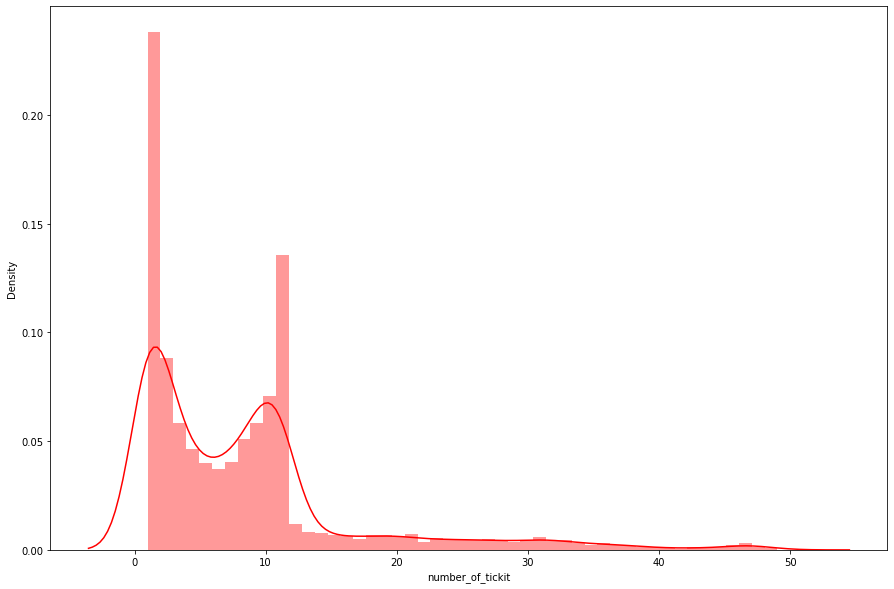

In [137]:
#Let's check the distribution of dependent variable (number_of_tickit)
plt.figure(figsize=(15,10))
sns.distplot(df['number_of_tickit'],color='r')

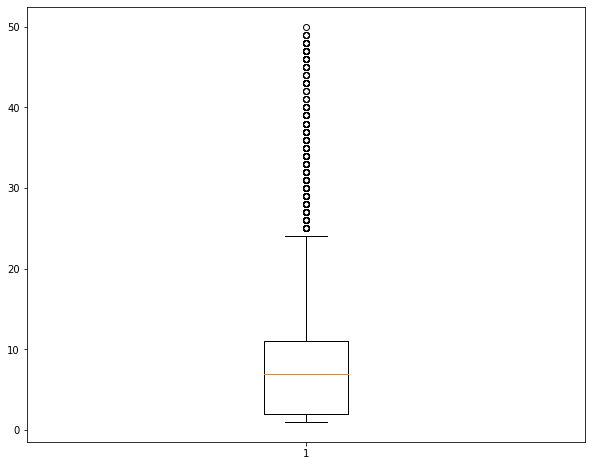

In [138]:
plt.boxplot(df['number_of_tickit'])
plt.show()

In [139]:
# creating dataframe to analyse Routes.
routes_tickets = df.groupby(['travel_from'])['number_of_tickit'].sum().reset_index()
routes_tickets

,travel_from,number_of_tickit
0,Awendo,1788
1,Homa Bay,6304
2,Kehancha,1909
3,Kendu Bay,1
4,Keroka,988
5,Keumbu,22
6,Kijauri,1031
7,Kisii,22607
8,Mbita,378
9,Migori,7027


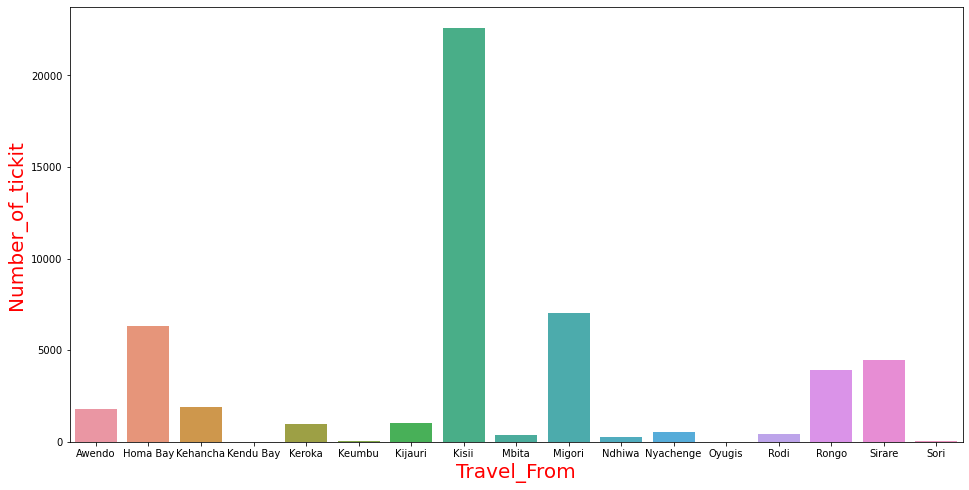

In [140]:
#plt.figure(figsize=(18,15))
#sns.scatterplot(x = df['travel_from'],y=df['number_of_tickit'])
plt.figure(figsize=(16,8))
sp=sns.barplot(x='travel_from',y='number_of_tickit',data=routes_tickets)
plt.xlabel('Travel_From',color='r',fontsize=20)
plt.ylabel('Number_of_tickit',color='r',fontsize=20)
plt.show()

In the above plot we can see the Total number of ticket sold for each Routes.

we can see that Kisii has most number of tickets sold.

# **Feature Engineering**

In [54]:
##combine travel date and travel time column and make a new feature called date.
df["date"]=df["travel_date"]+ " "+df["travel_time"]
df["date"]

0        17-10-17 7:15
1        19-11-17 7:12
2        26-11-17 7:05
3        27-11-17 7:10
4        27-11-17 7:12
             ...      
6244    20-04-18 23:10
6245     20-04-18 7:05
6246     20-04-18 7:09
6247     20-04-18 8:00
6248     14-11-17 5:10
Name: date, Length: 6249, dtype: object

In [55]:
#define a function based on time features
def  time_features(df1): 

  '''This function takes dataframe as an argument and extracts the
  different features from the date variable of the dataset and finaly returns the updated 
  dataset'''
  
  df1["date"]=pd.to_datetime(df1["date"])
  df1["day_of_week"]=df1["date"].dt.dayofweek
  df1["day_of_year"]=df1["date"].dt.dayofyear
  df1["day_of_month"]=df1["date"].dt.day
  df1["year_woy"]=df1["date"].dt.year.astype(str)+df1["date"].dt.weekofyear.astype(str)
  df1["hour"]=df1["date"].dt.hour
  df1["minute"]=df1["date"].dt.minute
  df1["is_weekend"]=df1["day_of_week"].apply( lambda x : 1 if x  in [5,6] else 0 )
  df1["year"]=df1["date"].dt.year
  df1["quarter"]=df1["date"].dt.quarter
  df1["month"]=df1["date"].dt.month
  return df1

In [56]:
#call the function
df_new = time_features(df)
df_new.shape

(6249, 18)

In [57]:
#new dataframw with addition of time features
df_new.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_tickit,date,day_of_week,day_of_year,day_of_month,year_woy,hour,minute,is_weekend,year,quarter,month
0,1442,17-10-17,7:15,Migori,Bus,49,1,2017-10-17 07:15:00,1,290,17,201742,7,15,0,2017,4,10
1,5437,19-11-17,7:12,Migori,Bus,49,1,2017-11-19 07:12:00,6,323,19,201746,7,12,1,2017,4,11
2,5710,26-11-17,7:05,Keroka,Bus,49,1,2017-11-26 07:05:00,6,330,26,201747,7,5,1,2017,4,11
3,5777,27-11-17,7:10,Homa Bay,Bus,49,5,2017-11-27 07:10:00,0,331,27,201748,7,10,0,2017,4,11
4,5778,27-11-17,7:12,Migori,Bus,49,31,2017-11-27 07:12:00,0,331,27,201748,7,12,0,2017,4,11


In [58]:
#for particular car type
df_bus=df_new[df_new["car_type"]=="Bus"]
df_shuttle=df_new[df_new["car_type"]=="shuttle"]
     

In [59]:
#tuple
dfs=(df_bus,df_shuttle)
     

In [61]:
#car_type value
df_new["car_type"].unique()

array(['Bus', 'shuttle'], dtype=object)

# **Univariate Analysis**

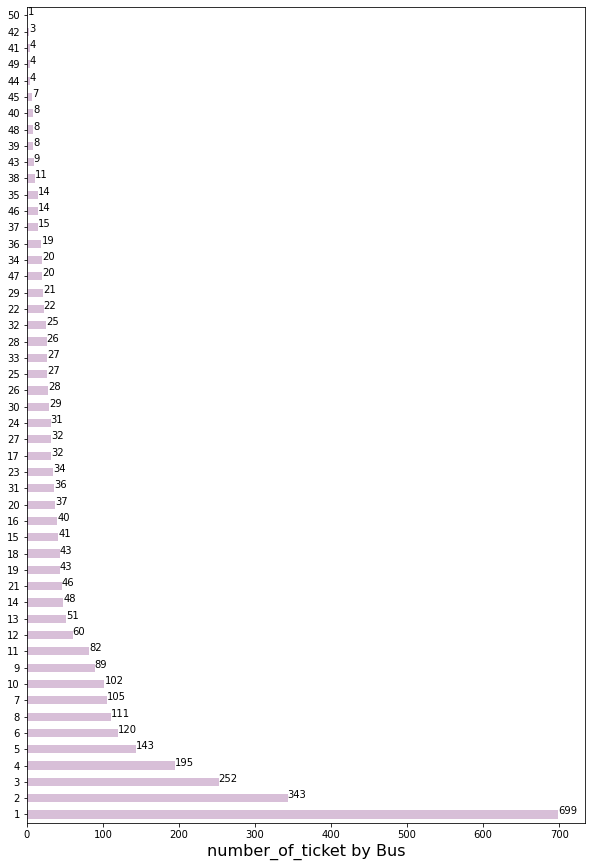

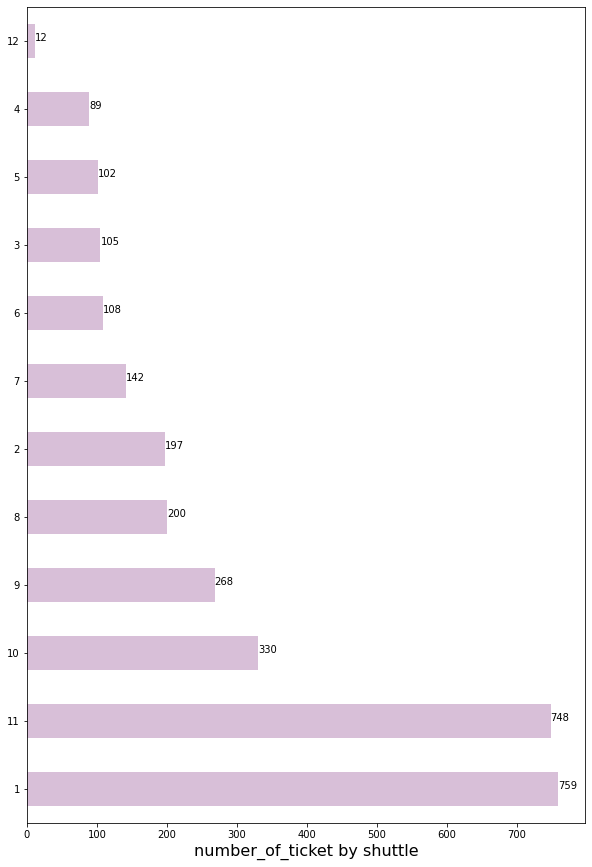

In [70]:
#countplot for both number of ticket when travel is done by bus and by shuttle
for d,car in zip(dfs,df_new["car_type"].unique()):
  y=d["number_of_tickit"].value_counts().reset_index()["number_of_tickit"]
  #barplot 
  plt.figure(figsize=(10,10))
  d["number_of_tickit"].value_counts().plot(kind='barh',color="thistle",figsize=(10,15))
  for index, value in enumerate(y):
    plt.text(value, index, str(value))
  plt.xlabel("number_of_ticket by " + car, fontsize=16)
  plt.show()

## **Summary:**

By Bus, Number of ticket 1 is most frequent with value 699.

By shuttle, Number of ticket 1 and 11 are most frequent with values 759 and 748 respectively.

In [72]:
#let's check for a particular number of ticket 50 which has frequency 1 i.e., 50 people are travel from the particular vehicle on a specific route on a specific day and time.
df_new[df_new["number_of_tickit"]==50]
     

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_tickit,date,day_of_week,day_of_year,day_of_month,year_woy,hour,minute,is_weekend,year,quarter,month
1924,8454,09-01-18,7:00,Sirare,Bus,49,50,2018-09-01 07:00:00,5,244,1,201835,7,0,1,2018,3,9


Highest number of tickets is 50, in bus to travel from Sirare to Nairobi at 7:00 A.M. on 09-01-18 .

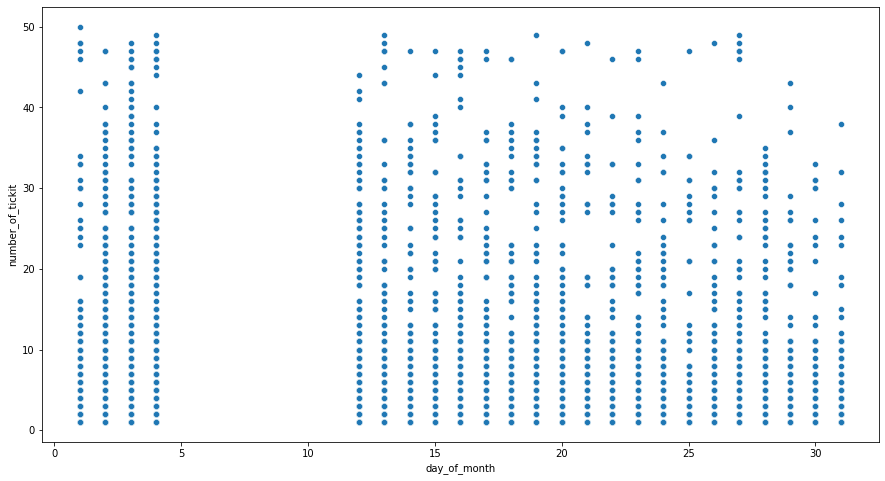

In [144]:
#scatter plot to understand day of month relation with number of tickets.
plt.rcParams['figure.figsize']= (15,8)
sns.scatterplot(x=df_new['day_of_month'],y= df_new['number_of_tickit'])

# **Observation**

We can see that there is the gap between 5 to 11 in the day of the month. We can assume that there is official holyday of public transport between these days. we can also say that the number of tickets in all the days of month are almost same.

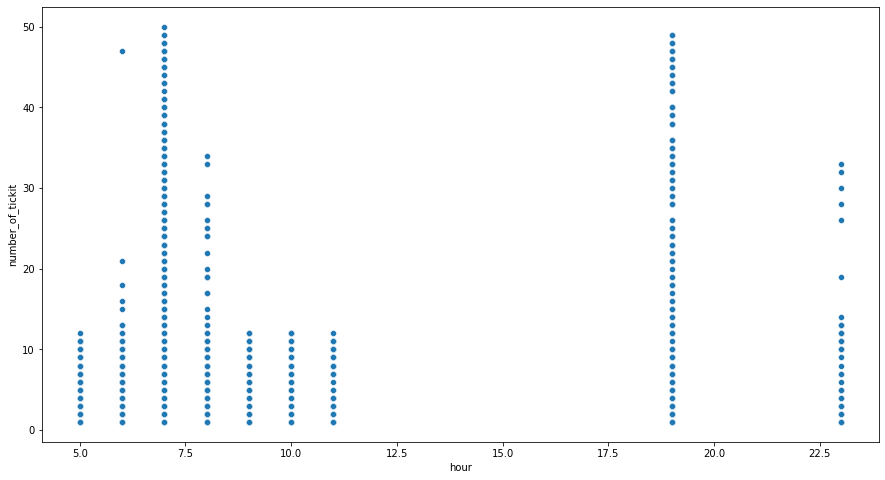

In [145]:
#scatter plot to understand hour relation with number of tickets.
plt.rcParams['figure.figsize']= (15,8)
sns.scatterplot(x=df_new['hour'],y= df_new['number_of_tickit'])

## **Observation:**

We can see that most of the ticktes were sold at 7 AM and 8 PM. And that seems true because in the morning most of the people go to the work and office.

From the above we can say that there is no ride between 12pm to 5.30Pm

## **Let's add distance and time taken column in our dataset using Google Maps**

In [146]:
#calculating distance between two points using google maps.
distance = {'Migori': 370 , 'Keroka': 280, 'Homa Bay':360, 'Kisii':305.1, 'Keumbu':295, 'Rongo':332,
'Kijauri':271, 'Oyugis':330.6, 'Awendo':351, 'Sirare':392, 'Nyachenge':326, 'Kehancha': 387.7,
'Kendu Bay':347, 'Sori':399, 'Rodi':348, 'Mbita':401, 'Ndhiwa': 371}
df_new["distance"]=df_new.travel_from.map(distance)

In [147]:
#calculating travel time between two points using google maps.
#  7*60 is converting hours into minutes.
time = {'Migori': 7*60+8 , 'Keroka': 5*60, 'Homa Bay':7*60, 'Kisii':5*60+34, 'Keumbu':5*60+20, 'Rongo':6*60+21,
'Kijauri':60*4+50,'Oyugis':5*60+50, 'Awendo':6*60+38, 'Sirare':7*60+30, 'Nyachenge':6*60+10, 'Kehancha':7*60+10,
'Kendu Bay':6*60+10, 'Sori':7*60+30, 'Rodi':6*60+40, 'Mbita':7*60+23, 'Ndhiwa': 7*60}
df_new["time_taken"]=df_new.travel_from.map(time)

In [148]:
df_new.head(10)

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,...,day_of_month,year_woy,hour,minute,is_weekend,year,quarter,month,distance,time_taken
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49,...,17,201742,7,15,0,2017,4,10,370.0,428
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49,...,19,201746,7,12,1,2017,4,11,370.0,428
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49,...,26,201747,7,5,1,2017,4,11,280.0,300
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49,...,27,201748,7,10,0,2017,4,11,360.0,420
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49,...,27,201748,7,12,0,2017,4,11,370.0,428
5,5781,22A,Mpesa,VGG7Q3MVJX,27-11-17,7:09,Homa Bay,Nairobi,Bus,49,...,27,201748,7,9,0,2017,4,11,360.0,420
6,5784,1X,Mpesa,3OPU23FHRB,20-04-18,5:10,Kisii,Nairobi,shuttle,11,...,20,201816,5,10,0,2018,2,4,305.1,334
7,5789,1X,Mpesa,BPRX4UMFFN,20-04-18,9:50,Kisii,Nairobi,shuttle,11,...,20,201816,9,50,0,2018,2,4,305.1,334
8,5790,1B,Mpesa,DC8ABRSXXK,20-04-18,7:06,Kisii,Nairobi,Bus,49,...,20,201816,7,6,0,2018,2,4,305.1,334
9,5791,1,Mpesa,HGQURN0SZS,20-04-18,6:00,Kisii,Nairobi,shuttle,11,...,20,201816,6,0,0,2018,2,4,305.1,334


In [149]:
df["travel_time"] = df["travel_time"].str.split(':').apply(lambda x: int(x[0]) + (int(x[1])/60))

In [150]:
df_new.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,...,day_of_month,year_woy,hour,minute,is_weekend,year,quarter,month,distance,time_taken
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7.250000,Migori,Nairobi,Bus,49,...,17,201742,7,15,0,2017,4,10,370.0,428
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7.200000,Migori,Nairobi,Bus,49,...,19,201746,7,12,1,2017,4,11,370.0,428
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7.083333,Keroka,Nairobi,Bus,49,...,26,201747,7,5,1,2017,4,11,280.0,300
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7.166667,Homa Bay,Nairobi,Bus,49,...,27,201748,7,10,0,2017,4,11,360.0,420
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7.200000,Migori,Nairobi,Bus,49,...,27,201748,7,12,0,2017,4,11,370.0,428


lets see correlation of distance, time taken and number of tickets.

In [151]:
corr_columns = df_new[['distance','time_taken', 'number_of_tickit']]

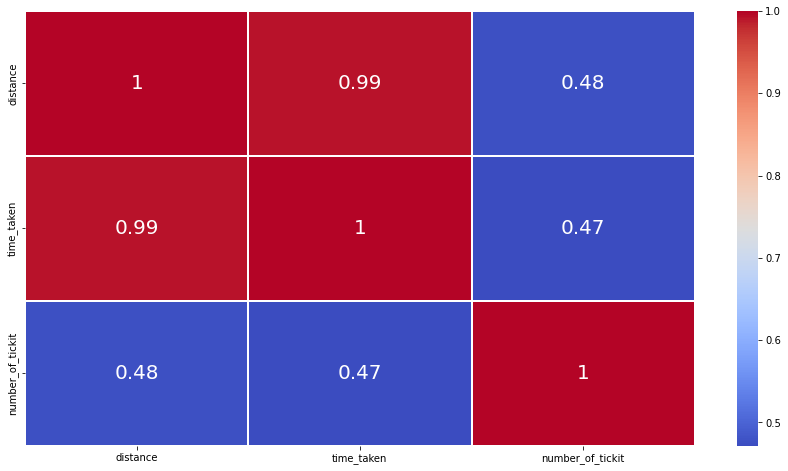

In [152]:
correlation = corr_columns.corr()
sns.heatmap(abs(correlation),annot=True,annot_kws={'size':20},cmap ='coolwarm',linewidth=1)
plt.show()

#corltn = np.triu(np.ones_like(corr_columns.corr()))
#corltn

#sns.heatmap(corr_columns.corr(),annot=True,mask=corltn)

We can see that distance and time_taken column have strong Multicollinearity with each other.
 so we have to do something about it.

we know that Speed = Distance/Time so we will use it and drop distance and time_taken.

In [153]:
# create speed column.
df_new['speed']= df_new['distance']/df_new['time_taken']

In [154]:
df_new.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,...,year_woy,hour,minute,is_weekend,year,quarter,month,distance,time_taken,speed
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7.250000,Migori,Nairobi,Bus,49,...,201742,7,15,0,2017,4,10,370.0,428,0.864486
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7.200000,Migori,Nairobi,Bus,49,...,201746,7,12,1,2017,4,11,370.0,428,0.864486
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7.083333,Keroka,Nairobi,Bus,49,...,201747,7,5,1,2017,4,11,280.0,300,0.933333
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7.166667,Homa Bay,Nairobi,Bus,49,...,201748,7,10,0,2017,4,11,360.0,420,0.857143
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7.200000,Migori,Nairobi,Bus,49,...,201748,7,12,0,2017,4,11,370.0,428,0.864486


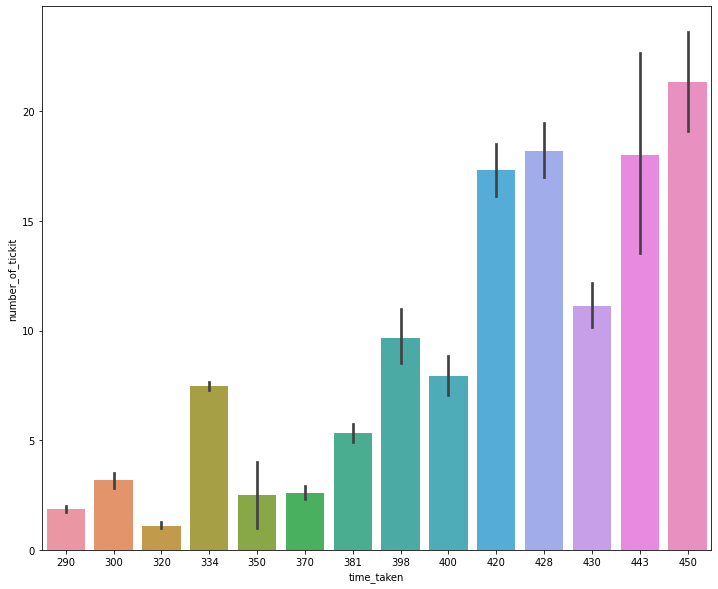

In [155]:
plt.rcParams['figure.figsize']= (12,10)
sns.barplot(x= 'time_taken',y= 'number_of_tickit', data= df_new)

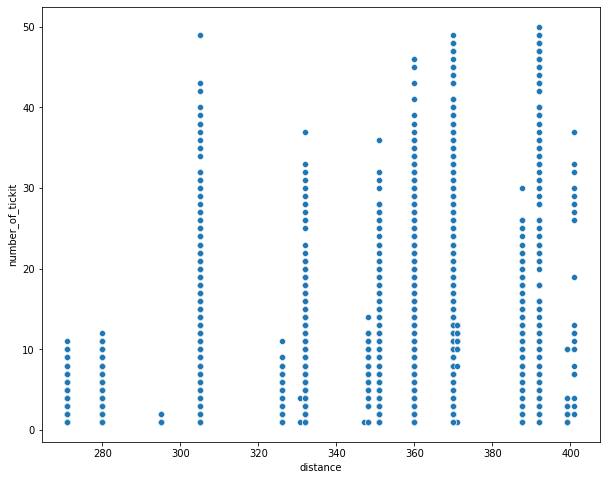

In [156]:
plt.rcParams['figure.figsize']= (10,8)
sns.scatterplot(x= 'distance',y= 'number_of_tickit', data= df_new)
plt.show()

In [157]:
num_col = df_new.describe().columns.values
num_col

array(['ride_id', 'travel_time', 'max_capacity', 'number_of_tickit',
       'day_of_week', 'day_of_year', 'day_of_month', 'hour', 'minute',
       'is_weekend', 'year', 'quarter', 'month', 'distance', 'time_taken',
       'speed'], dtype=object)

In [158]:
#categorical features
cat_col=df_new.describe(include="object").columns.values
cat_col

array(['seat_number', 'payment_method', 'payment_receipt', 'travel_date',
       'travel_from', 'travel_to', 'car_type', 'year_woy'], dtype=object)

In [159]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(W):
  #Calculating VIF
  vif = pd.DataFrame()
  vif["variables"] = W.columns
  vif["VIF"] = [variance_inflation_factor(W.values, i) for i in range(W.shape[1])]

  return(vif)

In [160]:
#check Variance Inflation Factor(VIF)
calc_vif(df_new[[i for i in num_col]])

,variables,VIF
0,ride_id,2.280895e+01
1,travel_time,inf
2,max_capacity,8.833225e+00
3,number_of_tickit,2.780677e+00
4,day_of_week,8.329709e+00
5,day_of_year,7.442119e+04
6,day_of_month,5.396086e+02
7,hour,inf
8,minute,inf
9,is_weekend,3.530248e+00


In [161]:
calc_vif(df_new[[i for i in num_col if i not in ['minute']]])

,variables,VIF
0,ride_id,22.808949
1,travel_time,1341.083825
2,max_capacity,8.833225
3,number_of_tickit,2.780677
4,day_of_week,8.329709
5,day_of_year,74421.191194
6,day_of_month,539.608599
7,hour,1267.400952
8,is_weekend,3.530248
9,year,157421.740294


In [162]:
calc_vif(df_new[[i for i in num_col if i not in ['minute','time_taken','distance','travel_time']]])

,variables,VIF
0,ride_id,22.479586
1,max_capacity,6.523408
2,number_of_tickit,2.385037
3,day_of_week,8.321600
4,day_of_year,74137.689620
5,day_of_month,537.394890
6,hour,8.943307
7,is_weekend,3.529132
8,year,4735.690961
9,quarter,117.780605


# **Encoding Categorical features**

In [163]:
# coverting categorical features into Numerical.
df_new = pd.get_dummies(df_new, columns=['travel_from','car_type'], drop_first=True)

In [164]:
df_new.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_to,max_capacity,number_of_tickit,date,...,travel_from_Mbita,travel_from_Migori,travel_from_Ndhiwa,travel_from_Nyachenge,travel_from_Oyugis,travel_from_Rodi,travel_from_Rongo,travel_from_Sirare,travel_from_Sori,car_type_shuttle
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7.250000,Nairobi,49,1,2017-10-17 07:15:00,...,0,1,0,0,0,0,0,0,0,0
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7.200000,Nairobi,49,1,2017-11-19 07:12:00,...,0,1,0,0,0,0,0,0,0,0
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7.083333,Nairobi,49,1,2017-11-26 07:05:00,...,0,0,0,0,0,0,0,0,0,0
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7.166667,Nairobi,49,5,2017-11-27 07:10:00,...,0,0,0,0,0,0,0,0,0,0
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7.200000,Nairobi,49,31,2017-11-27 07:12:00,...,0,1,0,0,0,0,0,0,0,0


In [165]:
data = df_new.copy()
data.columns

Index(['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time', 'travel_to', 'max_capacity',
       'number_of_tickit', 'date', 'day_of_week', 'day_of_year',
       'day_of_month', 'year_woy', 'hour', 'minute', 'is_weekend', 'year',
       'quarter', 'month', 'distance', 'time_taken', 'speed',
       'travel_from_Homa Bay', 'travel_from_Kehancha', 'travel_from_Kendu Bay',
       'travel_from_Keroka', 'travel_from_Keumbu', 'travel_from_Kijauri',
       'travel_from_Kisii', 'travel_from_Mbita', 'travel_from_Migori',
       'travel_from_Ndhiwa', 'travel_from_Nyachenge', 'travel_from_Oyugis',
       'travel_from_Rodi', 'travel_from_Rongo', 'travel_from_Sirare',
       'travel_from_Sori', 'car_type_shuttle'],
      dtype='object')

In [166]:
data.isnull().sum()

ride_id                  0
seat_number              0
payment_method           0
payment_receipt          0
travel_date              0
travel_time              0
travel_to                0
max_capacity             0
number_of_tickit         0
date                     0
day_of_week              0
day_of_year              0
day_of_month             0
year_woy                 0
hour                     0
minute                   0
is_weekend               0
year                     0
quarter                  0
month                    0
distance                 0
time_taken               0
speed                    0
travel_from_Homa Bay     0
travel_from_Kehancha     0
travel_from_Kendu Bay    0
travel_from_Keroka       0
travel_from_Keumbu       0
travel_from_Kijauri      0
travel_from_Kisii        0
travel_from_Mbita        0
travel_from_Migori       0
travel_from_Ndhiwa       0
travel_from_Nyachenge    0
travel_from_Oyugis       0
travel_from_Rodi         0
travel_from_Rongo        0
t

In [167]:
unnecessary_cols = ['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time','distance','number_of_tickit','time_taken', 'travel_to','year_woy','max_capacity','date']


# **implimenting Linear Regression**

In [168]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
import math

In [169]:
X= data.drop(unnecessary_cols, axis='columns')
Y= data['number_of_tickit']

In [170]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.25, random_state=50)
reg = LinearRegression()

# fitting linear model
reg.fit(X_train, y_train)

LinearRegression()

In [171]:
y_pred_train = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

In [172]:
r2_score_test = r2_score(y_test,y_test_pred)
print('r2_score:',r2_score_test)

adj_r2=1-(1-r2_score(y_test, y_test_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('Adjusted r2_score :',adj_r2)

r2_score: 0.41221786959933937
Adjusted r2_score : 0.40187903082356224


In [173]:
# Model score on Train and Test
train_model = reg.score(X_train,y_train)
print('Training Accuracy:',train_model)

test_model = reg.score(X_test,y_test)
print('Testing Accuracy:',test_model)

Training Accuracy: 0.3708374611579852
Testing Accuracy: 0.41221786959933937


In [174]:
def print_metrics(actual, predicted):
  print('MSE is {}'.format(mean_squared_error(actual, predicted)))
  print('RMSE is {}'.format(math.sqrt(mean_squared_error(actual, predicted))))
  print('RMSE is {}'.format(r2_score(actual, predicted)))
  print('MAE is {}'.format(mean_absolute_error(actual, predicted)))
  print('MAPE is {}'.format(np.mean(np.abs((actual - predicted) / actual)) * 100))

In [175]:
# Test dataset metrics
print_metrics(y_test, y_test_pred)

MSE is 44.28660598529501
RMSE is 6.654818253363123
RMSE is 0.41221786959933937
MAE is 4.567815771544136
MAPE is 151.88515419949934


We can see our model performence is not so good, Lets try some other models.

# **Implementing Lasso Regression** 

In [176]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

In [177]:
lasso_data = data.copy()

In [178]:
#creating dependent and independent variable
X = lasso_data.drop(unnecessary_cols, axis='columns')
Y = lasso_data['number_of_tickit']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25 , random_state= 0 )

In [179]:
X_test.shape

(1563, 27)

In [180]:
#lasso = Lasso()
alphas = [0.01,0.025,0.1, 0.15, 1, 5, 8]
for alpha in alphas:
  lasso = Lasso(alpha=alpha ,max_iter= 1500)
  lasso.fit(X_train, y_train)
  print('alpha: ',alpha)
  print('test Score: ',lasso.score(X_test, y_test))
  print('train Score: ',lasso.score(X_train, y_train))


alpha:  0.01
test Score:  0.37544070269471286
train Score:  0.3772042866737091
alpha:  0.025
test Score:  0.36513212504409887
train Score:  0.3701311355433431
alpha:  0.1
test Score:  0.33359350645765506
train Score:  0.3453572370579241
alpha:  0.15
test Score:  0.30287530931144735
train Score:  0.3198128252924618
alpha:  1
test Score:  0.0313833955898104
train Score:  0.06191106715102623
alpha:  5
test Score:  0.015559867182215137
train Score:  0.0239668813811017
alpha:  8
test Score:  0.005590566110219908
train Score:  0.008041924208287976


We see that at alpha = 0.01 it give best out of those

In [181]:
lasso = Lasso(alpha=0.01 , max_iter= 1500 )
lasso.fit(X_train, y_train)

Lasso(alpha=0.01, max_iter=1500)

In [182]:
y_pred_train = lasso.predict(X_train)
y_test2_pred = lasso.predict(X_test)

In [183]:
r2_score_test = r2_score(y_test,y_test2_pred)
print('r2_score:',r2_score_test)

adj_r2=1-(1-r2_score(y_test, y_test2_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('Adjusted r2_score :',adj_r2)

r2_score: 0.37544070269471286
Adjusted r2_score : 0.36445496912647646


In [184]:
# Model score on Train and Test
train_model = lasso.score(X_train,y_train)
print('Training Accuracy:',train_model)

test_model = lasso.score(X_test,y_test)
print('Testing Accuracy:',test_model)


Training Accuracy: 0.3772042866737091
Testing Accuracy: 0.37544070269471286


In [185]:
#Test dataset matrics
print_metrics(y_test, y_test2_pred)

MSE is 47.62081330322519
RMSE is 6.900783528210778
RMSE is 0.37544070269471286
MAE is 4.80627279584529
MAPE is 164.60534125646024


# **Cross Validation for Lasso Regression**

In [186]:

from sklearn.model_selection import GridSearchCV

In [187]:
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [188]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-15}

Using  {'alpha': 1e-15}  the negative mean squared error is:  -46.38084437802801


In [189]:
y_pred_lasso2 = lasso_regressor.predict(X_test)

In [190]:
print_metrics(y_test,y_pred_lasso2)

MSE is 47.27751257870102
RMSE is 6.875864496825183
RMSE is 0.37994318059041665
MAE is 4.768893270632136
MAPE is 162.13431128725998


In [191]:
r2_score_test = r2_score(y_test,y_pred_lasso2)
print('r2_score:',r2_score_test)

adj_r2=1-(1-r2_score(y_test, y_pred_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('Adjusted r2_score :',adj_r2)


r2_score: 0.37994318059041665
Adjusted r2_score : 0.369036643701779


# **Implementing Ridge Regression**

In [192]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [193]:
ridge_data = data.copy()

In [194]:
#creating dependent and independent variable
X= ridge_data.drop(unnecessary_cols, axis='columns')
Y= ridge_data['number_of_tickit']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25 , random_state= 0 )

In [195]:
alphas = [0.01,0.025, 0.1, 1, 5, 8]
for alpha in alphas:
  ridge = Ridge(alpha =alpha, max_iter= 1500)
  ridge.fit(X_train, y_train)
  print('alpha: ',alpha)
  print('test Score: ',ridge.score(X_test, y_test))
  print('train Score: ',ridge.score(X_train, y_train))

alpha:  0.01
test Score:  0.3804678901703803
train Score:  0.38123329476721557
alpha:  0.025
test Score:  0.38047012512788436
train Score:  0.3812329619844216
alpha:  0.1
test Score:  0.38047278513677285
train Score:  0.3812276997583758
alpha:  1
test Score:  0.38008601728766356
train Score:  0.38100821408830854
alpha:  5
test Score:  0.3774660733770775
train Score:  0.3798228461102231
alpha:  8
test Score:  0.37547996104425174
train Score:  0.3789282462157061


Let's take alpha = 1

In [196]:
ridge = Ridge(alpha =1, max_iter= 1500)
ridge.fit(X_train, y_train)

Ridge(alpha=1, max_iter=1500)

In [197]:
y_pred_train = ridge.predict(X_train)
y_pred_ridge = ridge.predict(X_test)

In [198]:
#Model Prediction
y_pred_ridge = ridge.predict(X_test)
print(ridge.score(X_train,y_train))
print(ridge.score(X_test,y_test))

print_metrics(y_test, y_pred_ridge)

r2 = r2_score(y_test, y_pred_ridge)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

0.38100821408830854
0.38008601728766356
MSE is 47.266621699769594
RMSE is 6.875072486873836
RMSE is 0.38008601728766356
MAE is 4.7606067148819635
MAPE is 161.82238516322772
R2 : 0.38008601728766356
Adjusted R2 :  0.3691819928360458


In [199]:
# Hyperprarameter tuning
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,2,3,4,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 2, 3, 4, 5, 10, 20, 30, 40, 45, 50,
                                   55, 60, 100]},
             scoring='neg_mean_squared_error')

In [200]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 2}

Using  {'alpha': 2}  the negative mean squared error is:  -46.48748034759109


In [201]:
#Model Prediction
y_pred_ridge = ridge_regressor.predict(X_test)

In [202]:
print_metrics(y_test,y_pred_ridge)

MSE is 47.06832703320848
RMSE is 6.86063605165064
RMSE is 0.41889942613055065
MAE is 4.665112008124748
MAPE is 149.23009372722666


In [203]:
r2 = r2_score(y_test, y_pred_ridge)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.41889942613055065
Adjusted R2 :  0.40867811310483393


# **Decision Tree**

In [212]:
from sklearn.tree import DecisionTreeRegressor

In [219]:
decision_tree_data = data.copy()

In [220]:
decision_tree_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6249 entries, 0 to 6248
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ride_id                6249 non-null   int64         
 1   seat_number            6249 non-null   object        
 2   payment_method         6249 non-null   object        
 3   payment_receipt        6249 non-null   object        
 4   travel_date            6249 non-null   object        
 5   travel_time            6249 non-null   float64       
 6   travel_to              6249 non-null   object        
 7   max_capacity           6249 non-null   int64         
 8   number_of_tickit       6249 non-null   int64         
 9   date                   6249 non-null   datetime64[ns]
 10  day_of_week            6249 non-null   int64         
 11  day_of_year            6249 non-null   int64         
 12  day_of_month           6249 non-null   int64         
 13  yea

In [221]:
# multicollinearity does not affect Tree based model so we will include distance and time take.
unnecessary_cols = ['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time','number_of_tickit', 'travel_to','date']


In [244]:
# creating dependent and independant variable.
X= decision_tree_data.drop(unnecessary_cols, axis='columns')
Y= decision_tree_data['number_of_tickit']

In [246]:
predictors = X

In [224]:
#train and test split
X_train , X_test, y_train, y_test = train_test_split(X,Y, test_size= 0.3, random_state=0 )

In [237]:

# fitting decision tree model
tree_model = DecisionTreeRegressor(criterion='squared_error', max_leaf_nodes=30,max_depth= 30,random_state=0)
dtree =tree_model.fit(X_train, y_train)

In [238]:
y_dt_pred = tree_model.predict(X_test)

In [235]:
#from sklearn.tree import export_graphviz
#export_graphviz(tree_model, out_file='tree.dot',feature_names=[])

ValueError: ignored

In [239]:
# Model score on Train and Test
train_model = tree_model.score(X_train,y_train)
print('Training Accuracy:',train_model)

test_model = tree_model.score(X_test,y_test)
print('Testing Accuracy:',test_model)

Training Accuracy: 0.5879395837909727
Testing Accuracy: 0.5558271116850865


In [240]:
r2_score_test = r2_score(y_test,y_dt_pred)
print('r2_score:',r2_score_test)

adj_r2=1-(1-r2_score(y_test, y_dt_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('Adjusted r2_score :',adj_r2)

r2_score: 0.5558271116850865
Adjusted r2_score : 0.5483559453596593


In [241]:
print_metrics(y_test,y_dt_pred)

MSE is 33.53602116726233
RMSE is 5.791029370264178
RMSE is 0.5558271116850865
MAE is 3.974281403026389
MAPE is 138.0580992841833


In [248]:
##
#%matplotlib inline
#feature_importances = pd.Series(dtree.feature_importances_,index=predictors)
#feature_importances.nlargest(10).plot(kind='barh')

ValueError: ignored

We can see we are not getting good score so far, Lets try Ensemble methods

In [ ]:
#df_new['period'] = np.nan
#df_new.loc[df_new.travel_time < 7, 'period'] = 'em'
#df_new.loc[(df_new.travel_time >= 7) & (df_new.travel_time < 11), 'period'] = 'am'
#df_new.loc[(df_new.travel_time >= 11) & (df_new.travel_time < 15), 'period'] = 'mid'
#df_new.loc[(df_new.travel_time >= 15) & (df_new.travel_time < 19), 'period'] = 'eve'
#df_new.loc[(df_new.travel_time >= 19) & (df_new.travel_time <= 24), 'period'] = 'pm'

In [ ]:
#pcount = dict(df_new['period'].value_counts())
#pcount


#df_new['hourly_travelers'] = np.log1p(df_new['period'].map(pcount))



#dcount = dict(df_new["day_of_year"].value_counts())
#df_new["daily_travelers"] = np.log1p(df_new["day_of_year"].map(dcount))
#df_new.head()

In [ ]:
#df_new.columns

In [ ]:
#df_new.month.value_counts()

In [ ]:
#encoding the car type category data
#df_new["car_type"] = pd.Categorical(df_new["car_type"])
#car_type_categories = df_new.car_type.cat.categories
#df_new["car_type"] = df_new.car_type.cat.codes

In [ ]:
#encoding the travel from category data
#df_new["travel_from"] = pd.Categorical(df_new["travel_from"])
#travel_from_categories = df_new.travel_from.cat.categories
#df["travel_from"] = df_new.travel_from.cat.codes

In [ ]:
#encoding the period
#df_new["period"] = pd.Categorical(df_new["period"])
#period_categories = df_new.period.cat.categories
#df_new["period"] = df_new.period.cat.codes

In [ ]:
#df_new.head()

In [ ]:
#tcount = dict(df["day_of_year"].value_counts())
#df["daily_travelers"] = (df["day_of_year"].map(tcount))

In [ ]:
#creating dependent and independent dataframe
#df_independent, df_dependent = df_new.drop(["number_of_tickit"], axis = 1),df_new["number_of_tickit"]

In [ ]:
#finding the correlation for multilinearity in independent variable
#plt.figure(figsize=(15,8))
#correlation = df_independent.corr()
#sns.heatmap(abs(correlation), annot=True)

In [ ]:
#Dropping the collinear columns
#Collinearcolumns = ["month","max_capacity", "period","quarter"]
#for a in Collinearcolumns:
 # df_independent.drop(a,inplace = True , axis = 1)

In [ ]:
#X=df_independent
#y =df_dependent

In [ ]:
#from statsmodels.stats.outliers_influence import variance_inflation_factor
#def calc_vif(W):

    # Calculating VIF
 #   vif = pd.DataFrame()
  #  vif["variables"] = W.columns
   # vif["VIF"] = [variance_inflation_factor(W.values, i) for i in range(W.shape[1])]

    #return(vif)

In [ ]:
#df_independent.info()